In [2]:
import pandas as pd

# Cargar el archivo
df = pd.read_excel(r"C:\Users\iazuaz\PyCharmMiscProject\model_RRSS\analysis\results_mar2025_a_jul2025.xlsx")

# Mostrar las primeras filas
df.head()

,Fecha,Modelo_Nuevo,Modelo_Gen,Reales,Modelo_Antiguo
0,2025-04-01,2127.0,0,2212,2208.0
1,2025-04-02,1983.0,0,1825,1784.0
2,2025-04-03,1888.0,0,1606,2244.0
3,2025-04-04,1903.0,0,1205,2078.0
4,2025-04-05,991.0,0,785,835.0


📊 Métricas de rendimiento hasta el 30 de abril de 2025:


,Modelo,MAE,RMSE,R²
0,Modelo_Antiguo,329.266667,406.633332,0.366248
1,Modelo_Nuevo,163.433333,214.654684,0.823399
2,Modelo_Gen,1217.066667,1319.908633,-5.677304


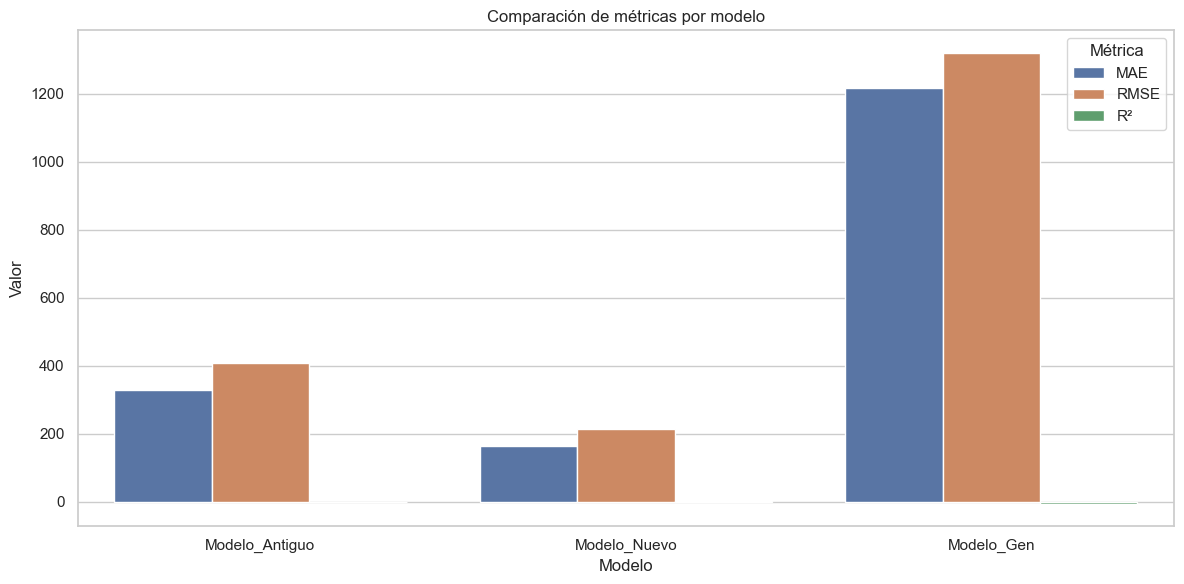

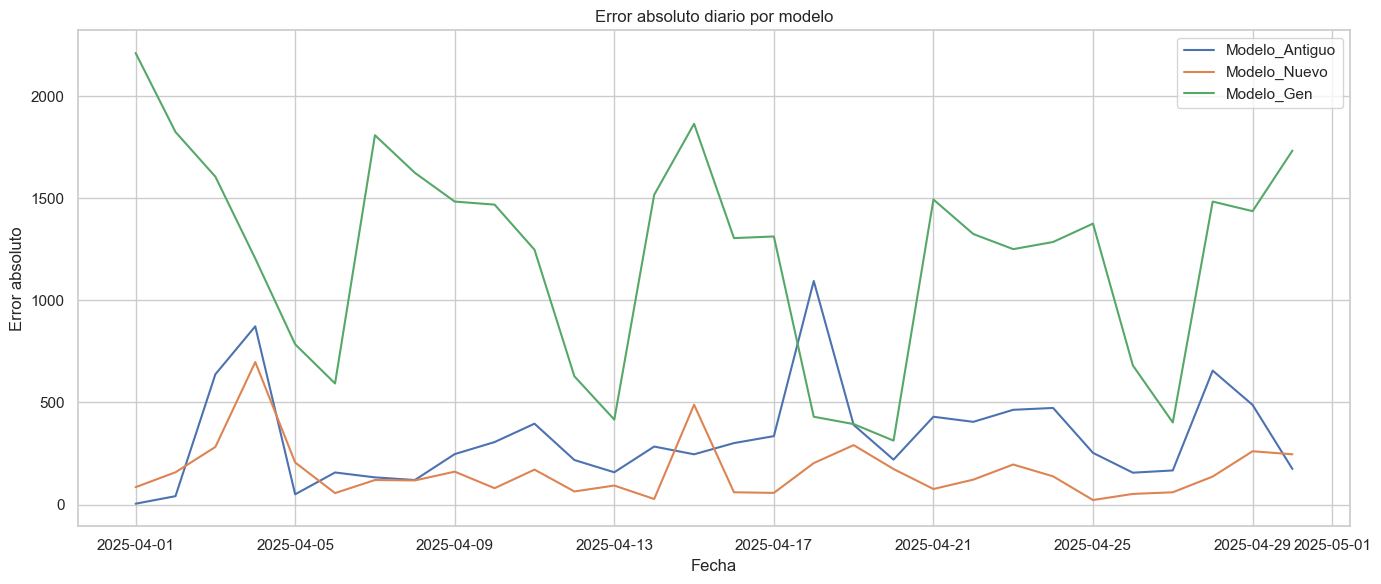

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# Asegurar que la columna Fecha sea datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Filtrar hasta el 30 de abril de 2025
fecha_corte = pd.to_datetime("2025-04-30")
df = df[df["Fecha"] <= fecha_corte].copy()

# Definir nombres de modelos y columna real
modelos = ["Modelo_Antiguo", "Modelo_Nuevo", "Modelo_Gen"]
col_real = "Reales"

# Crear DataFrame de resultados
metricas = []

for modelo in modelos:
    y_true = df[col_real]
    y_pred = df[modelo]

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    metricas.append({
        "Modelo": modelo,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

df_metricas = pd.DataFrame(metricas)

# Mostrar tabla de métricas
print("📊 Métricas de rendimiento hasta el 30 de abril de 2025:")
display(df_metricas)

# Visualización de métricas
df_metricas_melt = df_metricas.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_metricas_melt, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparación de métricas por modelo")
plt.ylabel("Valor")
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()

# Cálculo de errores absolutos diarios
for modelo in modelos:
    df[f"Error_Abs_{modelo}"] = np.abs(df[col_real] - df[modelo])

# Promedio de error absoluto diario
df_errores_diarios = df[["Fecha"] + [f"Error_Abs_{m}" for m in modelos]].copy()
df_errores_diarios = df_errores_diarios.set_index("Fecha")

# Visualización de errores absolutos diarios
plt.figure(figsize=(14, 6))
for modelo in modelos:
    plt.plot(df_errores_diarios.index, df_errores_diarios[f"Error_Abs_{modelo}"], label=modelo)

plt.title("Error absoluto diario por modelo")
plt.xlabel("Fecha")
plt.ylabel("Error absoluto")
plt.legend()
plt.tight_layout()
plt.show()


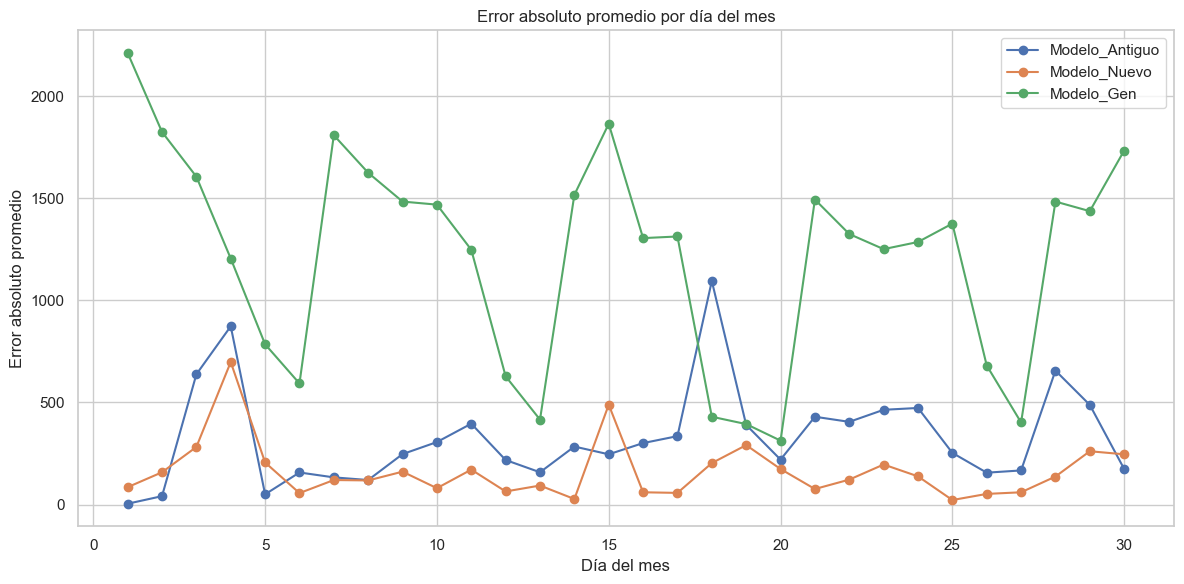

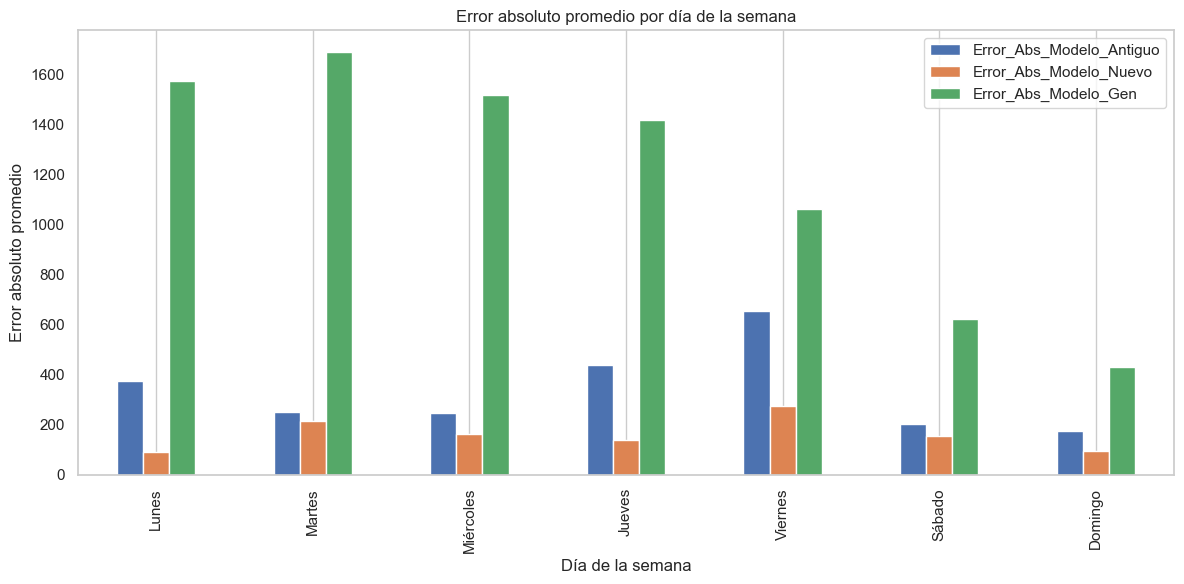

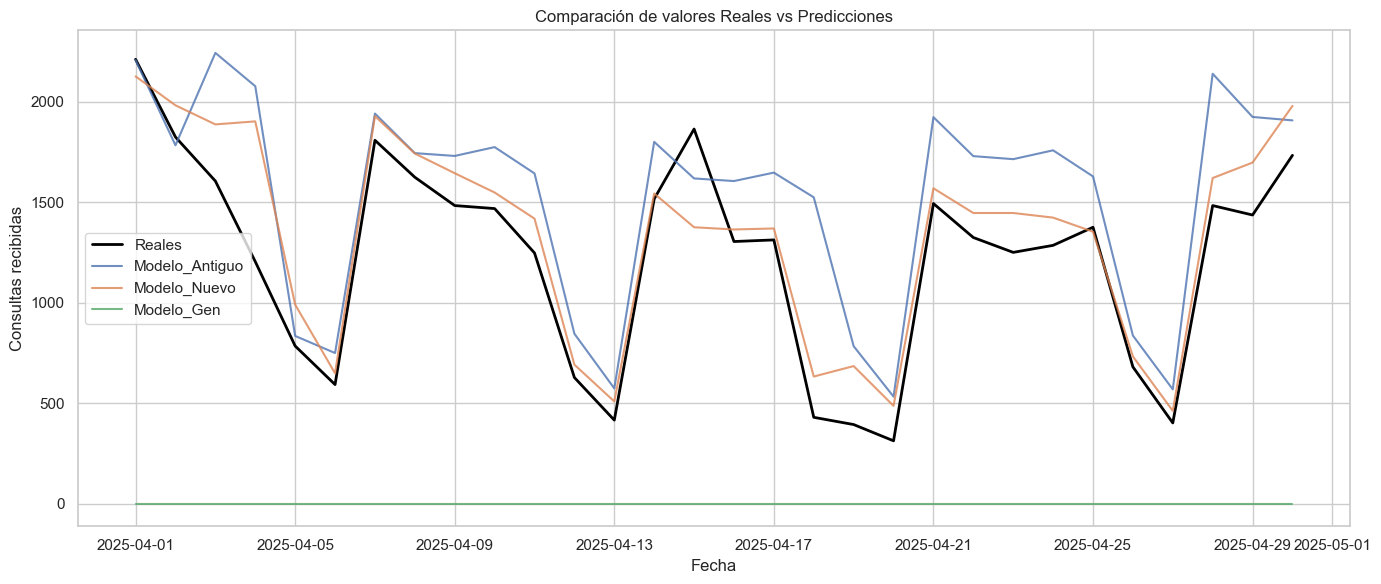

In [23]:
    # --------------------------------------------
    # 1. Error absoluto promedio por día del mes
    # --------------------------------------------
    df["Día_Mes"] = df["Fecha"].dt.day

    errores_dia_mes = df.groupby("Día_Mes")[[f"Error_Abs_{m}" for m in modelos]].mean().reset_index()

    plt.figure(figsize=(12, 6))
    for modelo in modelos:
        plt.plot(errores_dia_mes["Día_Mes"], errores_dia_mes[f"Error_Abs_{modelo}"], marker='o', label=modelo)

    plt.title("Error absoluto promedio por día del mes")
    plt.xlabel("Día del mes")
    plt.ylabel("Error absoluto promedio")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # --------------------------------------------
    # 2. Error absoluto promedio por día de la semana
    # --------------------------------------------
    dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    df["Día_Semana"] = df["Fecha"].dt.dayofweek  # 0 = lunes
    df["Nombre_Día_Semana"] = df["Día_Semana"].apply(lambda x: dias_semana[x])

    errores_semana = df.groupby("Nombre_Día_Semana")[[f"Error_Abs_{m}" for m in modelos]].mean()
    errores_semana = errores_semana.reindex(dias_semana)  # Asegurar orden

    errores_semana.plot(kind="bar", figsize=(12, 6))
    plt.title("Error absoluto promedio por día de la semana")
    plt.ylabel("Error absoluto promedio")
    plt.xlabel("Día de la semana")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()


    # --------------------------------------------
    # 3. Comparación visual: Predicciones vs Reales
    # --------------------------------------------
    plt.figure(figsize=(14, 6))
    plt.plot(df["Fecha"], df["Reales"], label="Reales", linewidth=2, color="black")
    for modelo in modelos:
        plt.plot(df["Fecha"], df[modelo], label=modelo, alpha=0.8)

    plt.title("Comparación de valores Reales vs Predicciones")
    plt.xlabel("Fecha")
    plt.ylabel("Consultas recibidas")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
